In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split

In [24]:
path = "../../original_data.txt"

smiles = pd.read_csv(path, sep='\t')


# Exclude Null Values, reset index and only leave smiles column
smiles = smiles[smiles["CANONICAL_SMILES"].notnull().values].reset_index()["CANONICAL_SMILES"]

short_smiles = smiles[smiles.str.len() < 150].reset_index()["CANONICAL_SMILES"]

fixedEntries = {0: "Padding", 1:"Start", 2: "\n"}
smilesString = "".join(short_smiles)
int2char = dict(enumerate(sorted(set(smilesString)), len(fixedEntries)))
int2char.update(fixedEntries)

print(short_smiles.size/smiles.size)
#with open("data/int2char.txt", 'w') as f:
#        json.dump(int2char, f)

0.9764496720811839


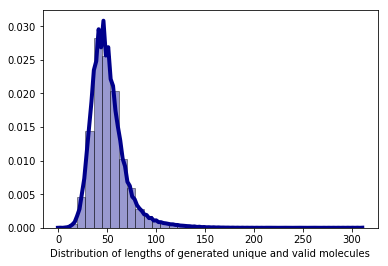

In [12]:
generated = pd.read_csv("validMolecules.txt", sep='\t', squeeze = True, names = ["Distribution of lengths of generated unique and valid molecules"])
sns.distplot(generated.str.len(), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Stefan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


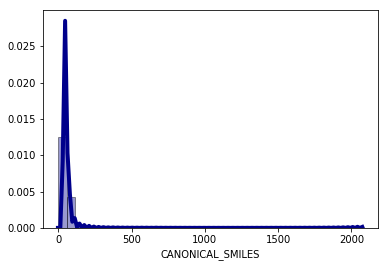

In [53]:
sns.distplot(smiles.str.len(), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

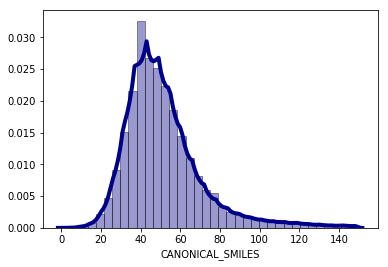

In [54]:
sns.distplot(short_smiles.str.len(), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [55]:
smiles_train, smiles_test = train_test_split(short_smiles, test_size=0.4, random_state=0)
smiles_test, smiles_val = train_test_split(smiles_test, test_size=0.5, random_state=0)

In [56]:
#pd.DataFrame(smiles_train).to_csv("data/train_set.csv", header=None, index=None)
#pd.DataFrame(smiles_val).to_csv("data/validation_set.csv", header=None, index=None)
#pd.DataFrame(smiles_test).to_csv("data/test_set.csv", header=None, index=None)

In [15]:
with open("../dataForBook/lossListTrain20.txt", 'r') as f:
            x1 = json.load(f)
with open("../dataForBook/lossListVal20.txt", 'r') as f:
            x2 = json.load(f)
with open("../dataForBook/lossListTest10.txt", 'r') as f:
            x3 = json.load(f)

0.5122977970663966
0.5116600808880386


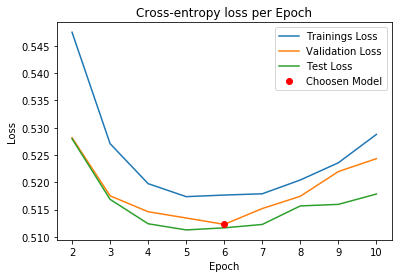

In [23]:
#TODO Add test loss
batches_train = 8110
batches_val = 2704

training_loss = np.array(x1)
validation_loss = np.array(x2)
#Skip the 0th epoch
test_loss = np.array(x3[batches_val:])

training_losses = np.reshape(training_loss, (-1,batches_train))
validation_losses = np.reshape(validation_loss, (-1,batches_val))
test_losses = np.reshape(test_loss, (-1,batches_val))

m = np.mean(validation_losses,axis = 1)
n = np.mean(test_losses,axis = 1)
i = 1

plt.plot(np.mean(training_losses,axis = 1)[i:len(n)], label = "Trainings Loss")
plt.plot(np.mean(validation_losses,axis = 1)[i:len(n)], label = "Validation Loss")
plt.plot(np.mean(test_losses,axis = 1)[i:len(n)], label = "Test Loss")
plt.plot(np.argmin(m) - i, m[np.argmin(m)], "ro", label = "Choosen Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(range(len(n) - i), range(i + 1,len(n) + 1))
plt.title("Cross-entropy loss per Epoch")
plt.legend()
plt.plot()

print(m[np.argmin(m)])
print(n[np.argmin(m)])

A - V:  61694 97.53224197420641 2.467758025793576
V - U:  192813 92.09234436338642 7.907655636613587
A - U:  89.81972814421748


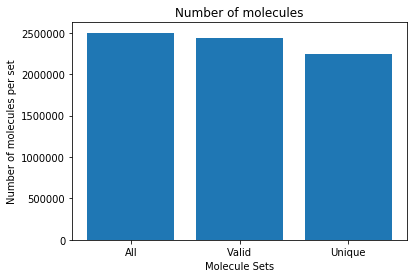

In [13]:
#Visualize all to unique molecules
num_all = 2500002 
num_valid = 2438308
num_unique = 2245495
nums = [num_all,num_valid, num_unique] 
plt.bar(range(3),nums)
plt.xlabel("Molecule Sets")
plt.ylabel("Number of molecules per set")
plt.xticks(range(3), ["All","Valid","Unique"])
plt.title("Number of molecules")
plt.plot()

print("A - V: ", num_all - num_valid, num_valid * 100/num_all, (1 - num_valid/num_all)* 100)
print("V - U: ", num_valid - num_unique, num_unique * 100/num_valid, (1 - num_unique/num_valid)* 100)
print("A - U: ", num_unique * 100/num_all)